In [ ]:
import itertools
import lime_explainer as lime

In [ ]:
feature_names = ['customer_id', 'monetary_dnn', 'monetary_btyd', 'frequency_dnn',
                 'frequency_btyd', 'recency', 'T', 'time_between',
                 'avg_basket_value', 'avg_basket_size', 'cnt_returns',
                 'has_returned', 'frequency_btyd_clipped', 'monetary_btyd_clipped',
                 'target_monetary_clipped', 'target_monetary']

In [ ]:
explainer = lime.Explainer()

In [ ]:
explainer.load_data(
  gcs_path = 'gs://ml-clv-data/model_data.csv',
  features_to_use = [1,3,5,6,7,8,9,10,11],
  feature_names = feature_names,
  target_idx = 15,
  skip_first=True,
  integer_rows=[1,2,3,7,8]
)

In [ ]:
explainer.create_cmle_client(
  gcp_project = 'ml-clv',
  gcp_model = 'dnn_airflow',
  gcp_model_version = 'v1',
  output_func = lambda x : x['predicted_monetary'] 
)

In [ ]:
record, df = explainer.explain_random_record()

In [ ]:
print(record)

In [ ]:
df

In [ ]:
mod_record = ','.join(['2000'] + [str(e) for e in record[1:]])
print('Mod Record: {}\n\n'.format(mod_record))
_, mod_df = explainer.explain_record(mod_record)

In [ ]:
mod_df

Intercept 2797.407891842352
Prediction_local [1726.36988477]
Right: 1262.09814453125
Intercept 3959.7899706833027
Prediction_local [-660.01302829]
Right: -876.33056640625
Intercept 4440.866944695415
Prediction_local [3372.44424613]
Right: 1115.521240234375
Intercept 49129.94439372061
Prediction_local [12650.26357718]
Right: 7197.34912109375
Intercept 10306.0722196238
Prediction_local [9281.79817885]
Right: 6835.05859375


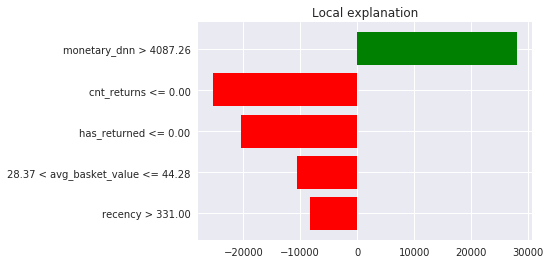

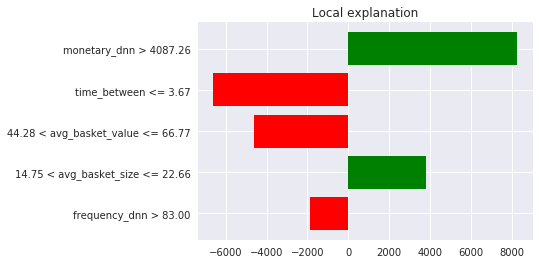

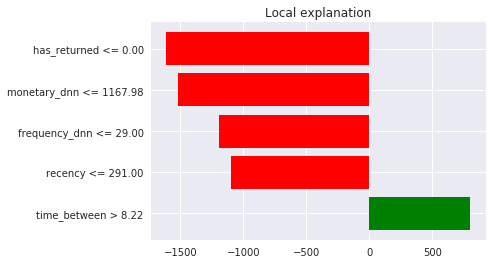

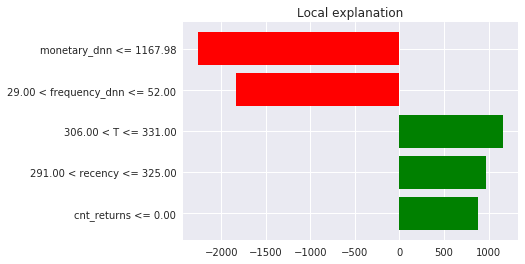

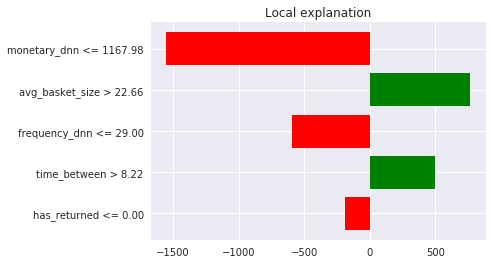

In [11]:
model_df = explainer.explain_model()

In [31]:
i = 4
import pandas as pd
df = pd.DataFrame.from_dict({
  'representation': [rep for rep, _ in text[i]],
  'weight': [weight for _, weight in text[i]]})

In [32]:
df

,representation,weight
0,monetary_dnn <= 1167.98,-1554.711879
1,avg_basket_size > 22.66,767.342211
2,frequency_dnn <= 29.00,-593.709935
3,time_between > 8.22,496.730203
4,has_returned <= 0.00,-186.688608
